# **Peer Pair Project**

## Dataset - Insurance

       Submitted by: Pranav Raj - 26,
                     B. Teja Sai - 38

## **Need for the study:**

Tentative Business Problem- 
    
There is an insurance company and they would like to know which category of people are claiming insurance. An insurance claim is a formal request by a policyholder to an insurance company for coverage or compensation for a covered loss or policy event. We wish to predict the insurance claim of a person based on their general health conditions.

## **Initial hypothesis on the Columns: Hypothesis Generation**

The dataset consists of 1340 patients, and their general health conditions. There are various factors corroborated to claim insurance from the company.

**age:** 
The patients ages vary from 18 to 60. Almost 50% lie from 29- 47 ages. We can hypothesise that senior citizens are more prone to claim the insurance.

**gender:**
There appear to be approximately equal number of males and females. Generally females have higher life expectancy. So we have to check whether the insurance claim is gender specific or not.  
Null Hypothesis: Average claim(males)<= Average claim(females)  
IAlternate Hypothesis: Average claim(males)> Average claim(females).


**bmi:**
The average bmi range for healthy people is 18.5—24.9. So the patients above (and below) the healthy range might claim higher insurance amount due to their obesity/ underweight.  
Null Hypothesis: Average claim(bmi)<= Average claim(non_bmi)  
Alternate Hypothesis: Average claim(bmi)> Average claim(non_bmi).

**bloodpressure**
For 19- 40 years of age, the blood pressure should be between 90-120 mm Hg. The patients not belonging to these ranges might have higher probability of claiming insurance.  
Null Hypothesis: Average claim(non-ideal bp)<= Average claim(ideal bp)  
Alternate Hypothesis: Average claim(non-ideal bp)> Average claim(ideal bp).

**diabetic**
Diabetes is a general sign of poor health and malaise. The patients with diabetes might claim higher insurance.
Null Hypothesis: Average claim(diabetic)<= Average claim(non- diabetic)   
Alternate Hypothesis: Average claim(diabetic)> Average claim(diabetic).

**children:**
The number of children of the patient indicates the number of dependents on the person. We can hypothesise that the number of dependents is directly proportional to the insurance amount claimed.

**smoker:**
Smoking is injurious to health and can cause health complications. We can find out whether smoking leads to higher insurance claims or not.  
Null Hypothesis: Average claim(smoker)<= Average claim(non- smoker)   
Alternate Hypothesis: Average claim(smoker)> Average claim(non-smoker).

**region:**
Patients of the same region might have similar patterns to insurance claims. We can find out which region has higher number of customers. We can hypothesise that the average claims of all the regions are equal.


**claim:**
This can be our target variable for the business problem. We wish to find out the impact of the aforementioned features on the insurance claims.



## **Evaluation Criteria**

Since the problem appears to be regression analysis, we can evaluate the target as 'Claim', based on Mean Absolute Percentage Error(MAPE), and Root Mean Squared Error (RMSE). We can also evaluate the regression fit based on R_2 Score.

In [82]:
#Importing the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#import libray for linear regression
from sklearn.linear_model import LinearRegression
#importing from calculating R-score
from sklearn.metrics import r2_score

from scipy import stats

from   statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#For plotting a decision tree
from sklearn import tree

#For getting the r_score value
from sklearn.metrics import r2_score

#For cross validation
from sklearn.model_selection import cross_val_score


In [2]:
os.chdir(r'/Users/pranavsmac/Documents/Insurance PPP')
data = pd.read_csv('insurance_data.csv')
data.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [3]:
data.columns

Index(['PatientID', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic',
       'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [4]:
data.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [5]:
data.dtypes

PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
dtype: object

In [6]:
data.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

## **Data Cleaning**

Data appreciation
•	Relevance, quality, availability of data

The dataset is quite relevant for evaluating the insurance claims as it involves the health and general conditions of the patient. However, there are few null values especially in ages and region. We would need to appropriately modify the data before having a further analysis and Hypothesis Testing.

There could be further availability of data regarding Patient/Family income, Working status, Type of Insurance and so on.

Since, there are 5 null values in age, and 3 null values in region, they can be modified for further analysis.

Also, since the number is low (considering 1340 patients), they can dropped for data cleaning!

We can use imputers to manage missing data, but since there is not much NaN values, we chose to rather drop those observations.

In [7]:
data = data.dropna()            #for removing null values

In [8]:
data.isnull().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [9]:
data = data.drop(['PatientID'], axis = 1)

In [10]:
data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,30.0,male,53.1,97,No,0,No,northwest,1163.46


# **Univariate Analysis**

In [11]:
def Graph_final(data, columns = '', directory = os.getcwd()):
    
    try:
        if columns == '':                
            org_data = data
        else:
            org_data = data[columns]  
        
        Numerical = []
        Categorical = []
        for columns in data:
            if (data.dtypes[columns] == 'int64') or (data.dtypes[columns] == 'float64'):
                Numerical.append(columns)
            else:
                Categorical.append(columns)       

        print ("***Graphs for Numerical data***\n")
        Discrete = []
        Continuous = []
        for i in Numerical:
            if len(data[i].value_counts())>10:
                print ("***Graph for Continuous data***\n")
                data.boxplot(column = i,grid = True,figsize = (6,4),vert = False)  
                data.hist(column = i,grid = False,figsize = (6,4),color = "turquoise",edgecolor = "blue")
                plt.savefig(directory + r'/%s.png' %i)
                plt.title(i, fontsize = 14),
                plt.show()
            else:
                print ("***Graph for Discrete data***\n")
                data[i].value_counts().plot(kind = 'bar',rot=0, figsize = (10,10),color = "pink",edgecolor = "red",fontsize = 13)
                plt.savefig(directory + r'/%s.png' %i)
                plt.title(i, fontsize = 14),
                plt.show()


        print ("\n***Graphs for Categorical data***\n")
        for i in Categorical or len(data[i].value_counts())<10:
            data[i].value_counts().plot(kind = 'bar',rot=0, figsize = (6,6),grid = True, color = "yellow",edgecolor = "green",fontsize = 13)
            plt.ylabel('count')
            plt.title(i, fontsize = 14)
            plt.savefig(directory + r'/%s.png' %i)
            plt.show()

    except KeyError:                                        
        print("\nPlease Enter valid column names")
    except FileNotFoundError:                              
        print("\nFile not found. Please enter the valid path of directory")
    except:
        print("\nERROR") 

***Graphs for Numerical data***

***Graph for Continuous data***



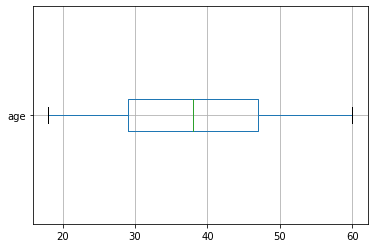

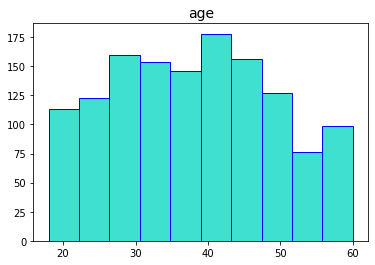

***Graph for Continuous data***



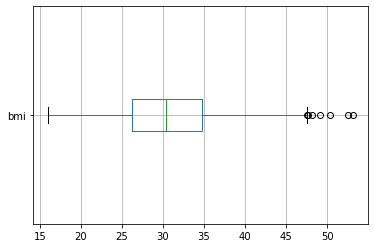

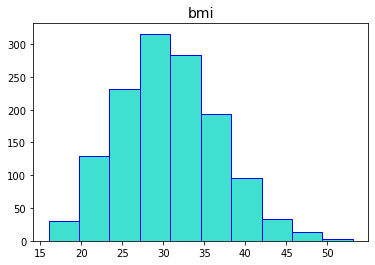

***Graph for Continuous data***



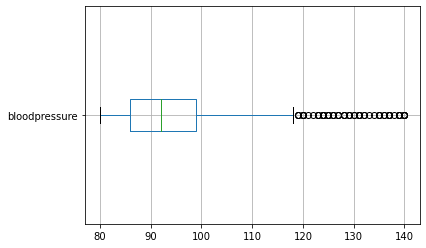

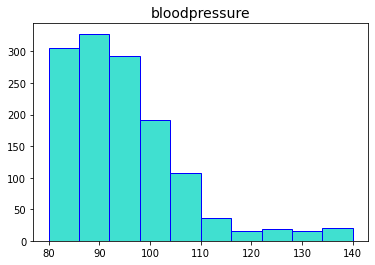

***Graph for Discrete data***



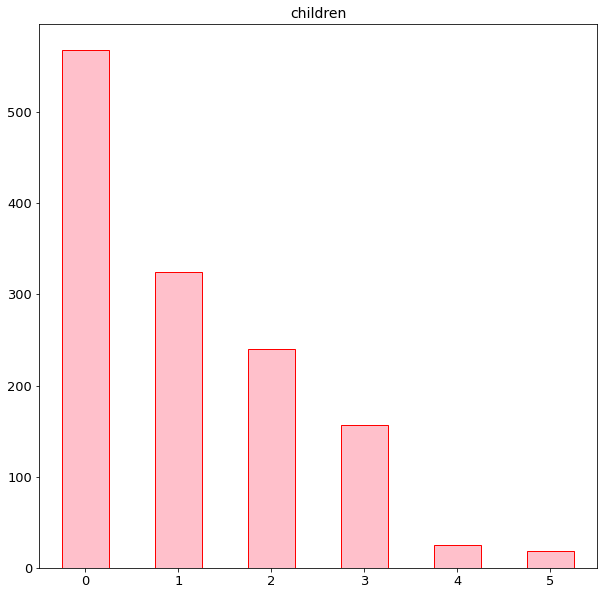

***Graph for Continuous data***



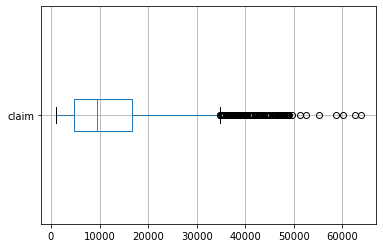

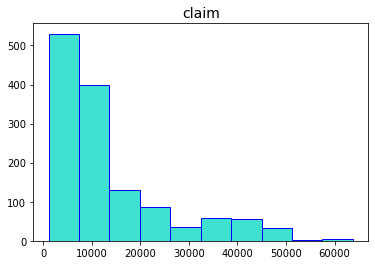


***Graphs for Categorical data***



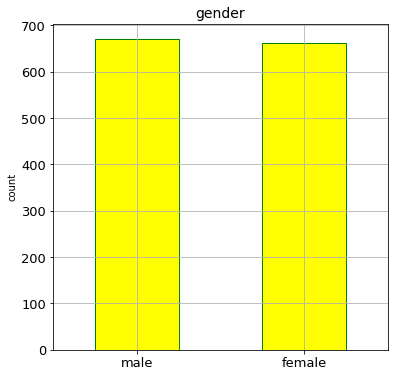

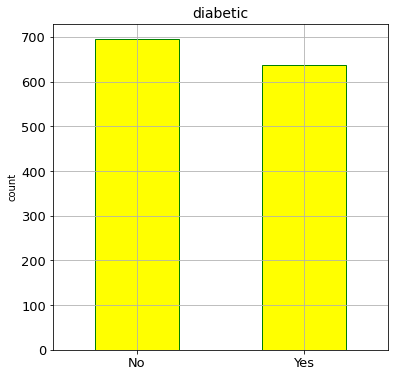

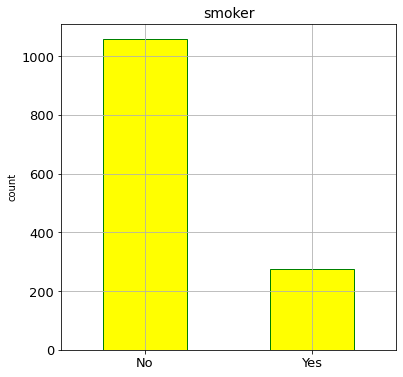

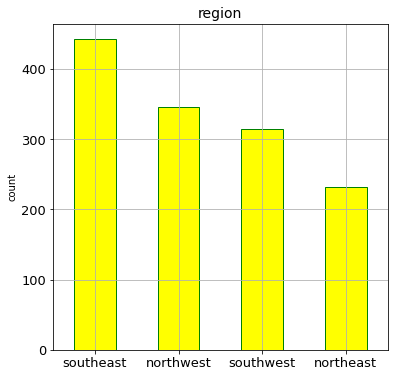

In [12]:
Graph_final(data, directory = "/Users/pranavsmac/Documents/Insurance PPP")

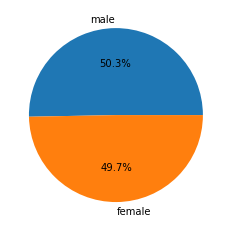

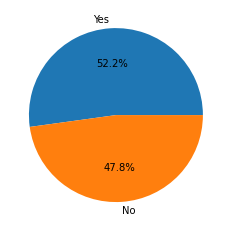

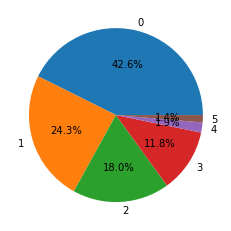

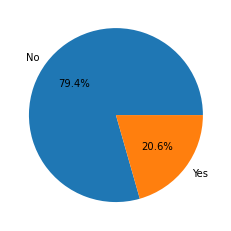

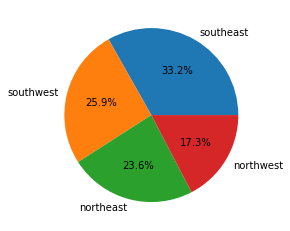

In [13]:
# Pie Charts for categorical values

labels = ['male', 'female']
plt.pie(data.gender.value_counts(), labels=labels, autopct='%.1f%%')
plt.savefig(r"/Users/pranavsmac/Documents/Insurance PPP" + r'Gender.png')
plt.show()

labels = ['Yes', 'No']
plt.pie(data.diabetic.value_counts(), labels=labels, autopct='%.1f%%')
plt.savefig(r"/Users/pranavsmac/Documents/Insurance PPP" + r'diabetic.png')
plt.show()

labels = ['0', '1','2','3','4','5']
plt.pie(data.children.value_counts(), labels=labels, autopct='%.1f%%')
plt.savefig(r"/Users/pranavsmac/Documents/Insurance PPP" + r'children.png')
plt.show()

labels = ['No','Yes']
plt.pie(data.smoker.value_counts(), labels=labels, autopct='%.1f%%')
plt.savefig(r"/Users/pranavsmac/Documents/Insurance PPP" + r'smoker.png')
plt.show()

labels = ['southeast','southwest','northeast','northwest']
plt.pie(data.region.value_counts(), labels=labels, autopct='%.1f%%')
plt.savefig(r"/Users/pranavsmac/Documents/Insurance PPP" + r'region.png')
plt.show()

**Binning few variables to get a better picture:**

In [14]:
#BMI:

bins=[0,18.5, 24.9, 100] 
group= ['Low', 'Average','High']
        
data['bmi_bin']= pd.cut(data['bmi'], bins, labels= group)

In [15]:
data['bmi_bin']

0       Average
1          High
7          High
8          High
9          High
         ...   
1335       High
1336       High
1337       High
1338       High
1339       High
Name: bmi_bin, Length: 1332, dtype: category
Categories (3, object): ['Low' < 'Average' < 'High']

<AxesSubplot:xlabel='bmi_bin', ylabel='count'>

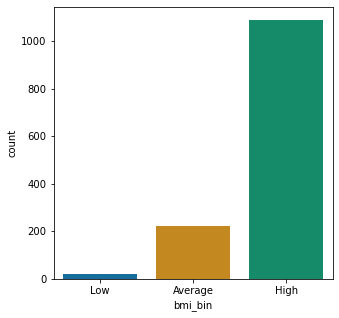

In [16]:
plt.subplots (figsize=(5,5))
sns.countplot (x='bmi_bin', data= data, palette = 'colorblind')

In [17]:
#BP:

bins=[0,90, 120, 200] 
group= ['Low', 'Average','High']
        
data['bp_bin']= pd.cut(data['bloodpressure'], bins, labels= group)

<AxesSubplot:xlabel='bp_bin', ylabel='count'>

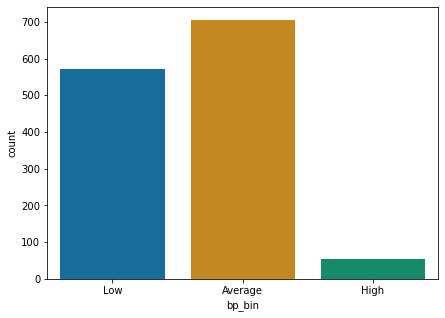

In [18]:
plt.subplots (figsize=(7, 5))
sns.countplot (x='bp_bin', data= data, palette = 'colorblind')

## **Observations and Questions from Univariate Analysis**

The dataset consists of 1340 patients, and their general health conditions. There are various factors corroborated to claim insurance from the company.

**Age:** 
The patients ages vary from 18 to 60. Almost 50% lie from 29- 47 ages. It appears to be a uniform distribution.   
Further question: Whether elderly have higher claim amounts?

**Gender:**
There appear to be approximately equal number of males and females.   
We can further check whether the insurance claim is gender specific or not?

**BMI:**
The average bmi range for healthy people is 18.5—24.9. So the patients above (and below) the healthy range might claim higher insurance amount due to their obesity/ underweight.
BMI appears to be normally distributed, with slightly positively skewness.  A higher proportion fall in high BMI region.
Further question: Is BMI correlated with higher claim amounts?


**Blood pressure**
The patients not belonging to the ideal ranges of (90-120) might have higher probability of claiming insurance.
It is Significantly positively skewed, owing to the high number of outliers. A higher proportion fall in average BP range.
Further question: Is non-ideal BP correlated with higher claim amounts?

**Diabetic**
Diabetes is a general sign of poor health and malaise. The patients with diabetes might claim higher insurance.
There is 52.1% of patients who are diabetic, and 47.9% of patients who are not. Nothing significant can be concluded from here. So we need further analysis on this.  
Further question: Do diabetic people have higher claim amounts than non-diabetic?

**Children:**
The number of children of the patient indicates the number of dependents on the person. We can hypothesise that the number of dependents is directly proportional to the insurance amount claimed.
Almost 43% of patients have no children. The other majority viz. 24% & 18% are single child or two child parents. There can be seen that a very less percentage of patients have more than 2 children.
It can also be concluded that Approximately 57% of the patients can be married. Since their could be single parents, or married couples with no children. We can observe further by doing bi-variate analysis.

**Smoker:**
Smoking is injurious to health and can cause health complications. 
Almost 79% of patients are non-smokers, and the remaining 21% of the patients are smokers. We need to do a further analysis on this as smoking may lead to smoking leads to higher insurance claims.  
Further question: Do smoker have higher average claim amounts than non-smokers?

**Region:**
Patients of the same region might have similar patterns to insurance claims. We can find out which region has higher number of customers.
We can see that, there is a higher number of patients in Southeast region. Data is almost representative from all the regions.  
Further question: Which region has a higher/lower claim amount?

**Claim:**
This is our target variable for the business problem. We wish to find out the impact of the aforementioned features on the insurance claims.
We can see a high positive skewness with a high density on claims ranging from 1000 - 20,000 units.  
Further question: Which of the attributes contribute most to claim amounts?

# **Bi - Variate**  Hypothesis Testing

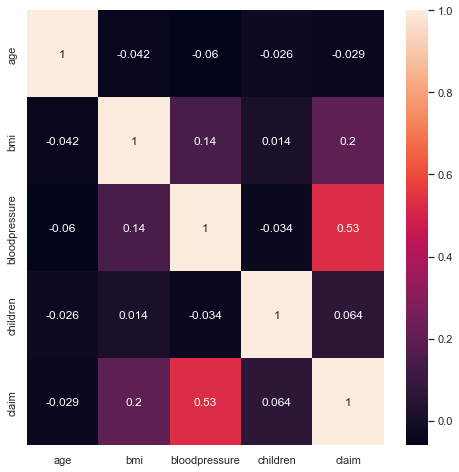

In [19]:
#ploting the heatmap for correlation
sns.set(rc = {'figure.figsize':(8,8)})
ax = sns.heatmap(data.corr(), annot=True)

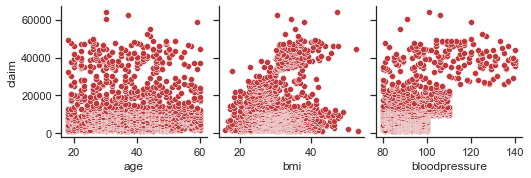

In [20]:
#Bivariate analysis of claim and numerical variables
sns.set(style="ticks", color_codes=True,palette='RdBu')
sns.pairplot(data=data,
                  y_vars=['claim'],
                  x_vars=['age','bmi','bloodpressure'])

* Age does not seem to be a correlated with value to claim.
* We can say, healthy group of BMIs ranging from 18.5 - 24.9 have claimed insurance, but  the claim amount doesn't seem to be higher.

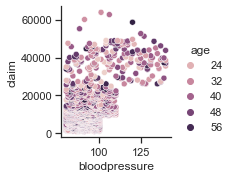

In [29]:
sns.set(style="ticks", color_codes=True, palette="rainbow")
sns.pairplot(data=data,
                  y_vars=['claim'],
                  x_vars=['bloodpressure'], hue='age')

Even from the multivariate analysis, we cannot see a direct impact of numerical columns on claim.

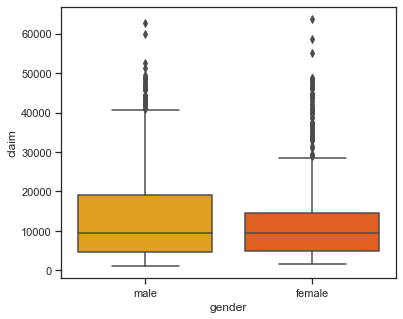

In [30]:
#Bivariate analysis of gender and claim
sns.boxplot(x = 'gender',y= "claim",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(6, 5)

plt.show()

In [31]:
data[['claim', 'gender']].groupby('gender').mean()

,claim
gender,
female,12569.578897
male,14071.891060


Conclusion:
* Since the Average claim of males is similar to Average claim of females, we can conclude that Gender has no significant influence over Claim.

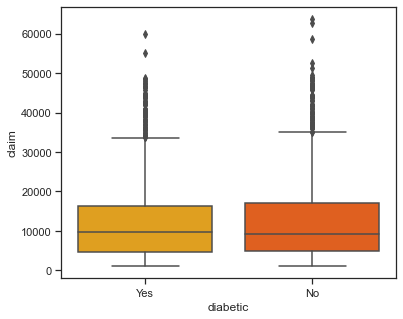

In [32]:
#Bivariate analysis of diabetic and claim
sns.boxplot(x = 'diabetic',y= "claim",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(6, 5)

plt.show()

In [33]:
data[['claim', 'diabetic']].groupby('diabetic').mean()

,claim
diabetic,
No,13406.602173
Yes,13236.483093


Conclusion:
* Since the Average claim of diabetic is similar to Average claim of non-diabetic, we can conclude that Diabetes has no significant influence over Claim.

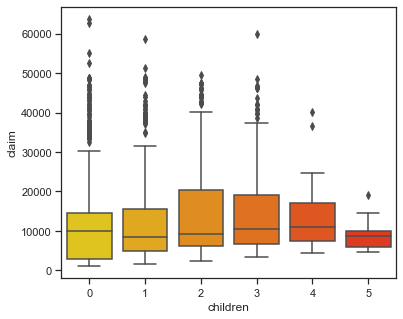

In [34]:
#Bivariate analysis of children and claim
sns.boxplot(x = 'children',y= "claim",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(6, 5)

plt.show()

In [35]:
data[['claim', 'children']].groupby('children').mean()

,claim
children,
0,12484.987923
1,12731.171821
2,15073.564000
3,15355.318535
4,13850.656800
5,8786.035556


Conclusion:
* We can conclude that number of children has no significant correlation over Claim.

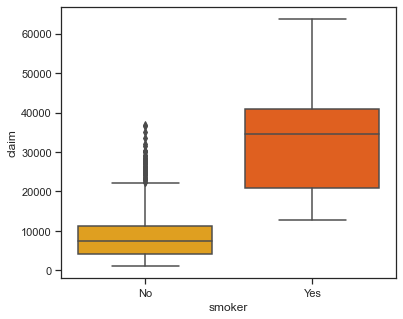

In [36]:
#Bivariate analysis of smoker and claim
sns.boxplot(x = 'smoker',y= "claim",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(6, 5)

plt.show()

In [37]:
smoker=pd.crosstab(data.smoker,columns="Count")
smoker

col_0,Count
smoker,
No,1058
Yes,274


In [38]:
data[['claim', 'smoker']].groupby('smoker').mean()

,claim
smoker,
No,8475.864537
Yes,32050.231971


In [39]:
data[['claim', 'smoker']].groupby('smoker').std()

,claim
smoker,
No,5985.190362
Yes,11541.547338


Since we can see the difference of claims between smokers and non-smokers visually, we can conduct a Hypothesis Test to proceed further.

In [40]:
from scipy import stats

Verify the claim that Smokers and Non-smokers get the same claim.
Samples of 274 and 1058 are drawn
Sample means were found to be 32050.23 and 8475.86 respectively.
Sample standard deviations were found to be 11541.54 and 5995.84 respectively.

Null Hypothesis: Smokers and Non-smokers get the same claim. µ(smokers)- µ(non-smokers)=0

Alternate Hypothesis: Smokers and Non-smokers do not get the same claim. Mu(smokers) <> Mu(non-smokers)

α = 0.05, n1 & n2 >30, Independent Samples. So we can conduct a z- test.

In [41]:
alpha=0.05
mu_smoker= 32050.23 
mu_nonsmoker= 8475.86 

std_smoker= 11541.54
std_nonsmoker= 5995.84

In [42]:
z_cl= stats.norm.ppf(alpha/2)
z_cr= stats.norm.ppf(1-alpha/2)
z_cl,z_cr

(-1.9599639845400545, 1.959963984540054)

In [43]:
z= (mu_smoker- mu_nonsmoker)/ np.sqrt(((std_smoker**2)/274)  + ((std_nonsmoker**2)/1058))
z

32.68747092891652

In [44]:
p_val= 2* stats.norm.sf(z)
p_val

2.3532961298715947e-234

## Decision:


critical value method

since z was greater than z critical, we can reject the Null Hypothesis. 

pval method

since pval was less than alpha, we can reject the Null Hypothesis.

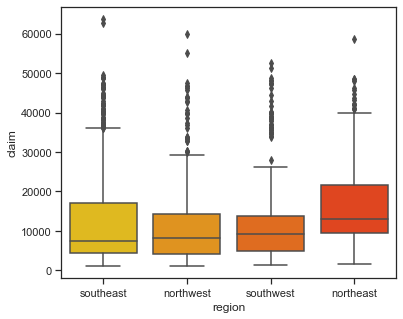

In [45]:
#Bivariate analysis of region and claim
sns.boxplot(x = 'region',y= "claim",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(6, 5)

plt.show()

In [46]:
data[['claim', 'region']].groupby('region').mean()

,claim
region,
northeast,16889.044719
northwest,11794.221855
southeast,13085.496833
southwest,12723.129841


**ANOVA of Regions vs Claims:**

We can analyze all the 4 region sample means at one time by analysis of variance (ANOVA). 

Independent Variable= region; Levels of classification= northeast, northwest, southeast, southwest
Dependent Variable= claim

The null hypothesis states that the population means for all treatment levels are equal.
Because of the way the alternative hypothesis is stated, if even one of the population means
is different from the others, the null hypothesis is rejected.

H0: m1 = m2 = m3 = m4

Ha: Atleast one of the means is different from others.

In [47]:
ne= data[data["region"]== "northeast"][["claim"]]
nw= data[data["region"]== "northwest"][["claim"]]
se= data[data["region"]== "southeast"][["claim"]]
sw= data[data["region"]== "southwest"][["claim"]]

In [48]:
f_test, p_val = stats.f_oneway(ne,nw,se,sw)
print(f_test)
print(p_val)

[8.98243337]
[6.84553364e-06]


In [50]:
mod = ols('claim ~ region', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
region       3.0  3.881790e+09  1.293930e+09  8.982433  0.000007
Residual  1328.0  1.912999e+11  1.440512e+08       NaN       NaN


Since F Stat is high, we can conclude that the sample means are far away from each other and the Null Hypothesis can be rejected.

## Feature Engineering:

**One Hot Encoding of Categorical Values**

* For categorical columns, since it has Yes/No as values, it cannot be used for Model fitting/Machine Learning.

* So it needs to changed into something which a machine can understand, i.e. 0s and 1s.

In [51]:
new_data= pd.get_dummies(data, columns= ["gender", "diabetic", "smoker", "region"], drop_first= True)

In [52]:
new_data.head()

,age,bmi,bloodpressure,children,claim,bmi_bin,bp_bin,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,1121.87,Average,Average,1,1,0,0,1,0
1,24.0,30.1,87,0,1131.51,High,Low,1,0,0,0,1,0
7,19.0,41.1,100,0,1146.80,High,Average,1,0,0,1,0,0
8,20.0,43.0,86,0,1149.40,High,Low,1,0,0,1,0,0
9,30.0,53.1,97,0,1163.46,High,Average,1,0,0,1,0,0


## Log reduction

In [53]:
data2 = pd.read_csv('insurance_data.csv')
data2 = data.dropna() 
data2["claim"] = np.log(data2.claim)
data2.tail()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_bin,bp_bin
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,10.917547,High,Low
1336,59.0,female,38.1,120,No,1,Yes,northeast,10.977996,High,Average
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,11.002456,High,Average
1338,37.0,male,30.4,106,No,0,Yes,southeast,11.044407,High,Average
1339,30.0,female,47.4,101,No,0,Yes,southeast,11.063045,High,Average


<AxesSubplot:xlabel='smoker', ylabel='claim'>

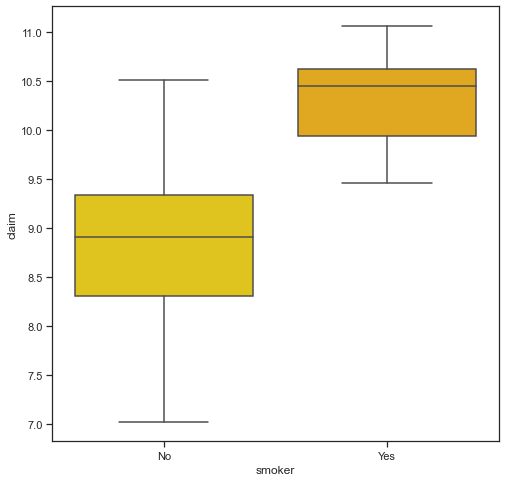

In [54]:
#Bivariate analysis of claim and numerical variables
sns.set(style="ticks", color_codes=True,palette='autumn_r')
sns.boxplot(x = 'smoker',y= "claim",data = data2)

<AxesSubplot:xlabel='diabetic', ylabel='claim'>

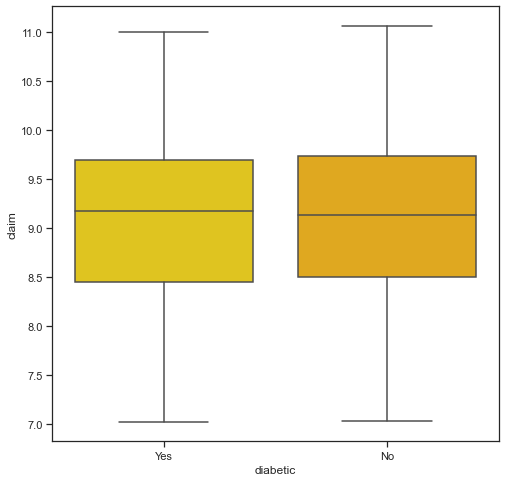

In [55]:
sns.set(style="ticks", color_codes=True,palette='autumn_r')
sns.boxplot(x = 'diabetic',y= "claim",data = data2)

For 19- 40 years of age, the blood pressure should be between 95–135. And for 41–60 years: 110–145. so nothing much can be concluded here, so we will be doing Bi-variate analysis between Age-Blood Pressure, as BP and Age might have high correlation.

Text(0.5, 1.0, 'BP - claim')

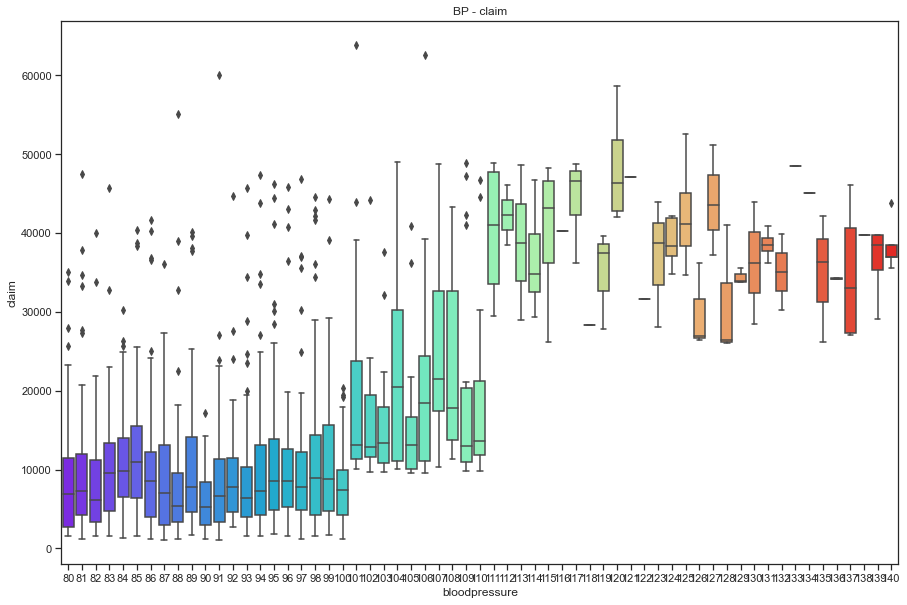

In [56]:
plt.figure(figsize=(15,10))
sns.boxplot(x='bloodpressure',y='claim',data=data, palette='rainbow')
plt.title("BP - claim")

Text(0.5, 1.0, 'claim - age')

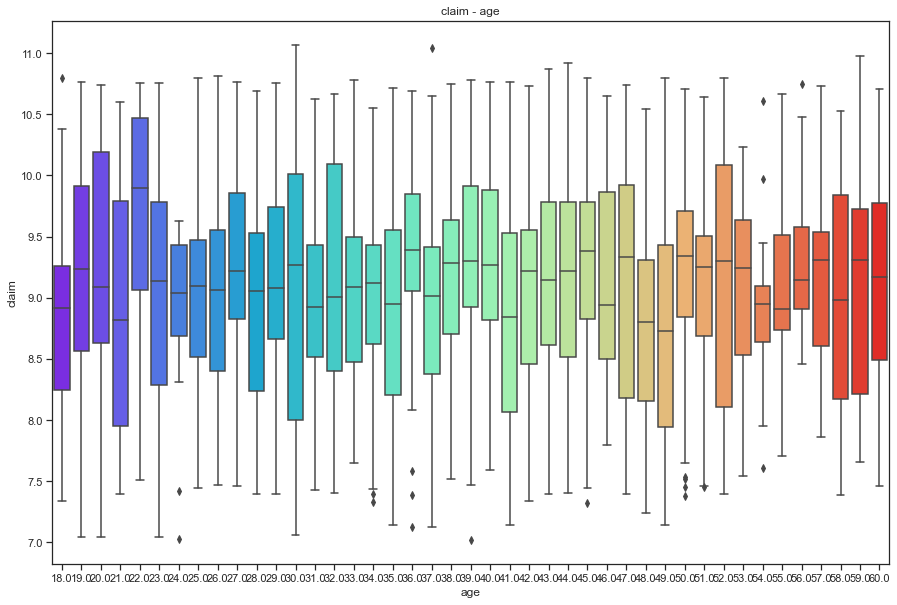

In [57]:
plt.figure(figsize=(15,10))
sns.boxplot(x='age',y='claim',data=data2, palette='rainbow')
plt.title("claim - age")

## Square root transformation of claim

In [58]:
data3 = pd.read_csv('insurance_data.csv')
data3 = data.dropna() 
data3["claim"] = np.sqrt(data3.claim)
data3.tail()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_bin,bp_bin
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,234.809284,High,Low
1336,59.0,female,38.1,120,No,1,Yes,northeast,242.014607,High,Average
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,244.992653,High,Average
1338,37.0,male,30.4,106,No,0,Yes,southeast,250.185671,High,Average
1339,30.0,female,47.4,101,No,0,Yes,southeast,252.528078,High,Average


<AxesSubplot:xlabel='smoker', ylabel='claim'>

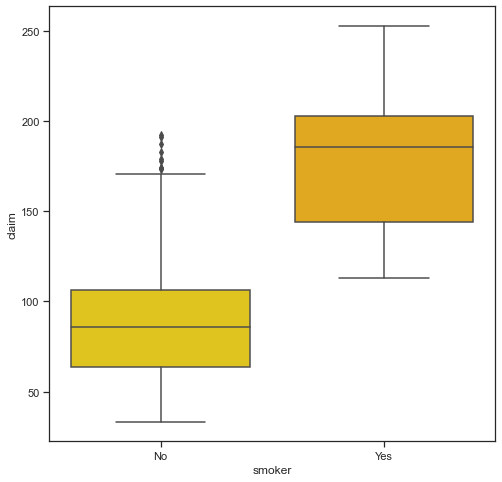

In [59]:
#Bivariate analysis of claim and numerical variables
sns.set(style="ticks", color_codes=True, palette='autumn_r')
sns.boxplot(x = 'smoker', y= "claim", data = data3)

<AxesSubplot:xlabel='diabetic', ylabel='claim'>

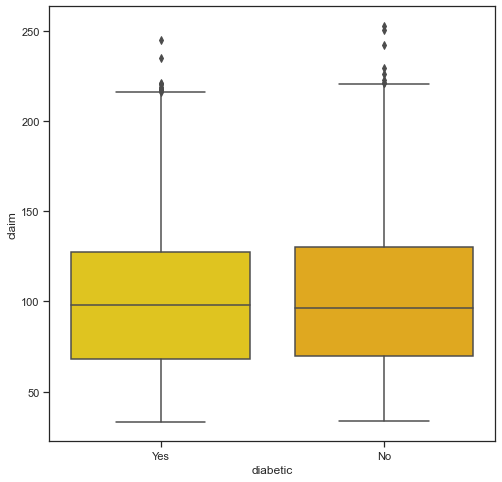

In [60]:
sns.set(style="ticks", color_codes=True,palette='autumn_r')
sns.boxplot(x = 'diabetic',y= "claim",data = data3)

Text(0.5, 1.0, 'claim - age')

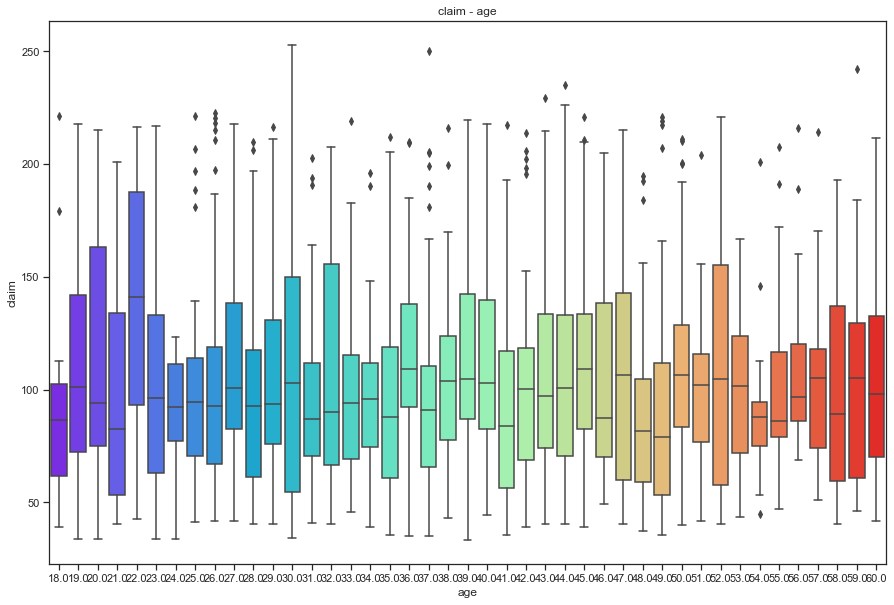

In [61]:
plt.figure(figsize=(15,10))
sns.boxplot(x='age',y='claim',data=data3, palette='rainbow')
plt.title("claim - age")

Text(0.5, 1.0, 'BP - claim')

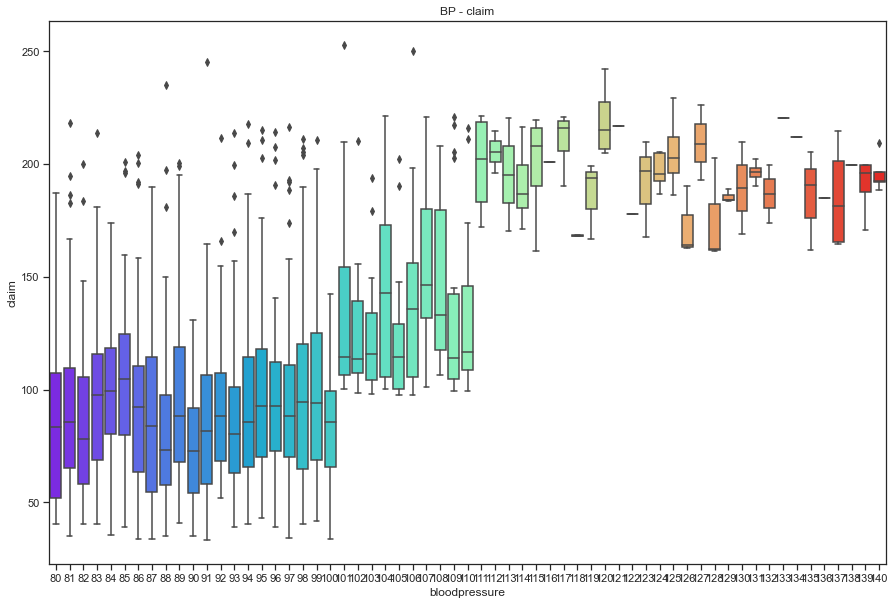

In [62]:
plt.figure(figsize=(15,10))
sns.boxplot(x='bloodpressure',y='claim',data=data3, palette='rainbow')
plt.title("BP - claim")

# Model Fitting

**Regression Analysis of BMI vs Claim**

In [23]:
X=data["bmi"]
Y=data["claim"]

In [24]:
#declaring instance for method LinearRegerssion
reg =LinearRegression()


x_mat=X.values.reshape(-1,1)
#x_mat.shape
r=reg.fit(x_mat,Y)

In [25]:
#finding out coefficient
b1=r.coef_
b1

array([395.69741553])

In [26]:
#finding interept
b0=r.intercept_
b0

1193.8231620178067

<function matplotlib.pyplot.show(close=None, block=None)>

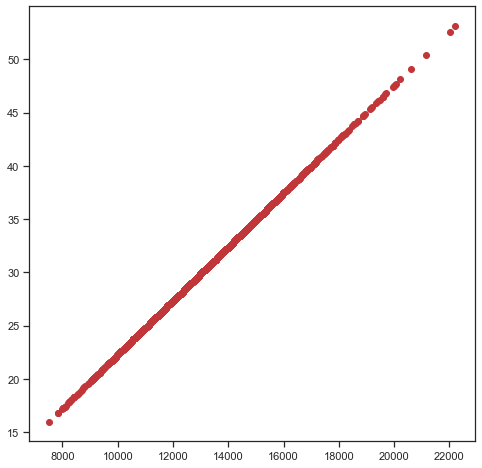

In [27]:
#plotting the regression line with equation
y_pred=b0+b1*x_mat
plt.scatter(y_pred,x_mat)
plt.show


2> R-Score is: 0.039978045413128216


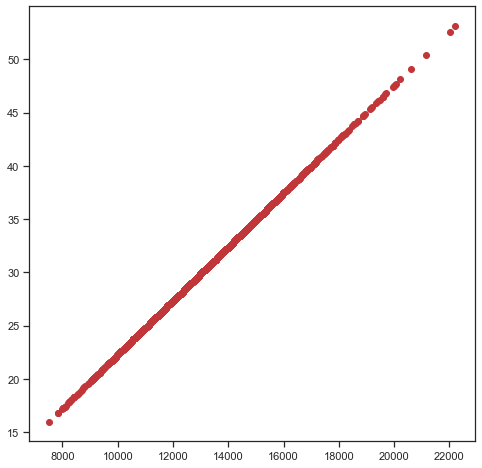

In [28]:
#answers
plt.scatter(y_pred,x_mat)
print("\n2> R-Score is:",r2_score(Y,y_pred))


So, BMI seems to have a good regression fit for predicting claim.

## Decision Tree model

<AxesSubplot:xlabel='claim', ylabel='Density'>

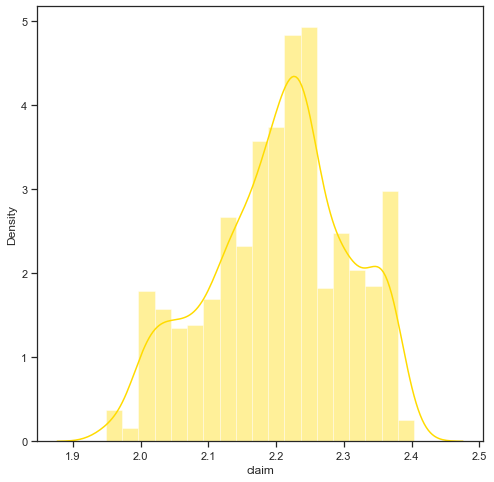

In [67]:
new_data.claim = np.log(new_data.claim)
sns.distplot(new_data.claim)

In [68]:
#Taking predictors and targets as X and y respectively
X=new_data[['bmi', 'bloodpressure' ,'smoker_Yes', 'region_southeast', 'region_southwest','region_southwest']]
y=new_data['claim']

In [69]:
X.head()

,bmi,bloodpressure,smoker_Yes,region_southeast,region_southwest,region_southwest
0,23.2,91,0,1,0,0
1,30.1,87,0,1,0,0
7,41.1,100,0,0,0,0
8,43.0,86,0,0,0,0
9,53.1,97,0,0,0,0


In [70]:
y.head()

0    1.949155
1    1.950373
7    1.952280
8    1.952601
9    1.954325
Name: claim, dtype: float64

In [71]:
## Splitting the data into train and test dataset in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [72]:
### Fitting a Regression Tree

#Taking a maximum depth and minimum sample leaf of regression tree
#The values would change after cross validation
reg_tree = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5)   #after 10 fold cross validation, the max depth is 6
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5)

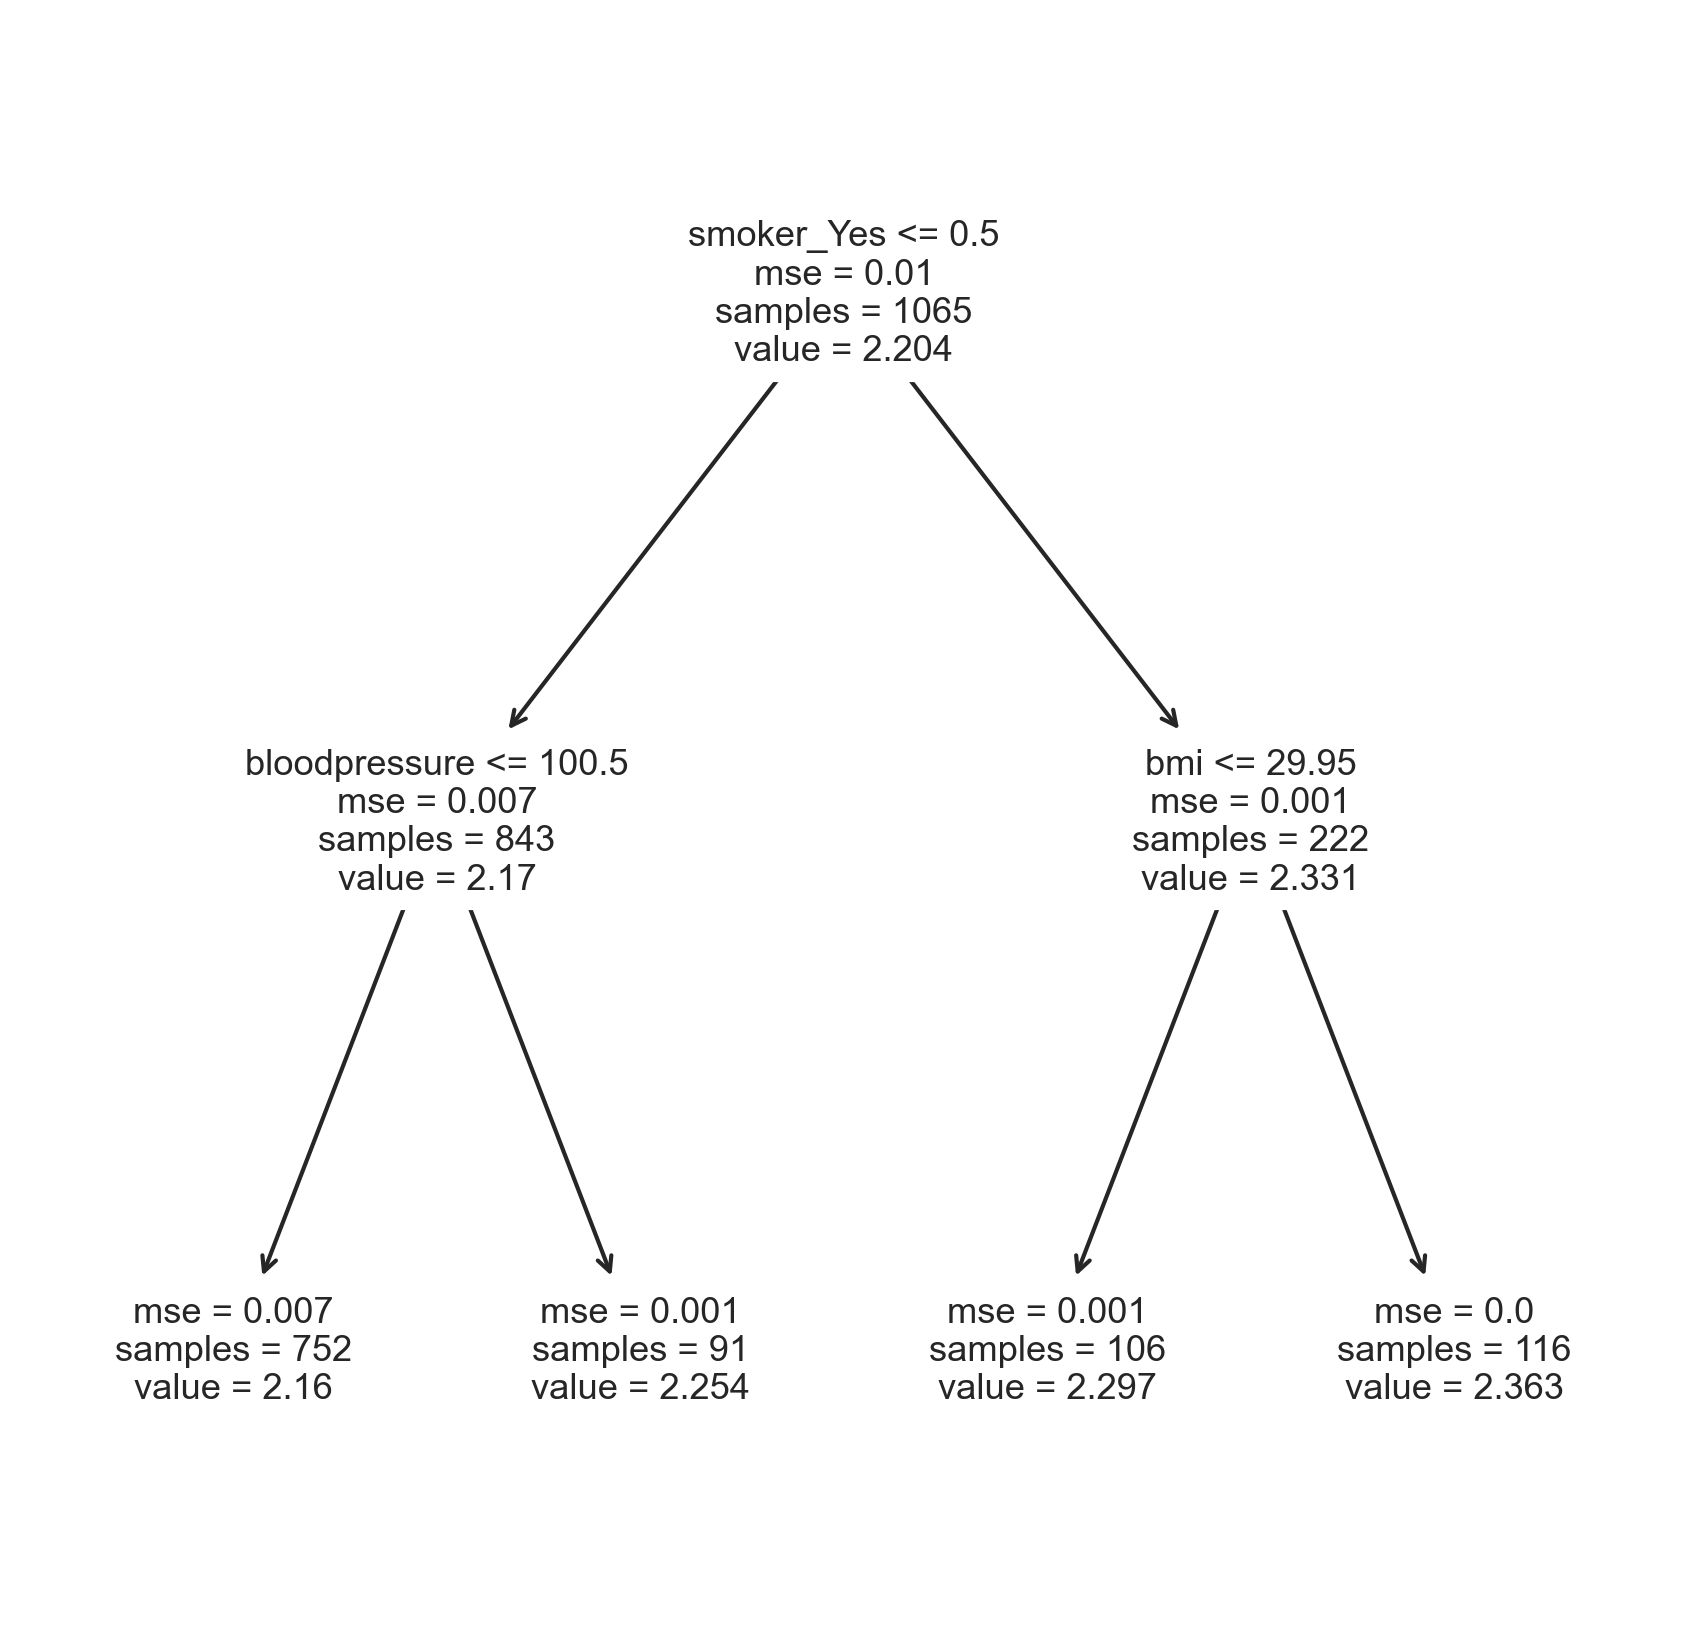

In [73]:
### Plotting a Regression Tree
fig, axes = plt.subplots(figsize=(7,7), dpi=300)   #Setting the figure size and dpi
tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [74]:
#Predicting the y values after fitting X_test into the trained model
y_pred = reg_tree.predict(X_test)
y_pred

array([2.36314794, 2.29682431, 2.36314794, 2.15987446, 2.15987446,
       2.15987446, 2.15987446, 2.15987446, 2.25382849, 2.25382849,
       2.15987446, 2.15987446, 2.36314794, 2.15987446, 2.15987446,
       2.15987446, 2.15987446, 2.15987446, 2.15987446, 2.15987446,
       2.15987446, 2.15987446, 2.36314794, 2.15987446, 2.36314794,
       2.15987446, 2.15987446, 2.15987446, 2.15987446, 2.15987446,
       2.15987446, 2.25382849, 2.15987446, 2.15987446, 2.15987446,
       2.36314794, 2.15987446, 2.29682431, 2.29682431, 2.29682431,
       2.15987446, 2.15987446, 2.15987446, 2.15987446, 2.29682431,
       2.15987446, 2.25382849, 2.15987446, 2.15987446, 2.15987446,
       2.15987446, 2.36314794, 2.15987446, 2.15987446, 2.29682431,
       2.15987446, 2.15987446, 2.29682431, 2.15987446, 2.15987446,
       2.15987446, 2.15987446, 2.29682431, 2.36314794, 2.29682431,
       2.36314794, 2.15987446, 2.15987446, 2.15987446, 2.15987446,
       2.29682431, 2.15987446, 2.25382849, 2.15987446, 2.15987

In [75]:
# RMSE
np.sqrt(np.mean((y_test - y_pred)**2))

0.06895517394024357

In [76]:
#R score
r2_score(y_test, y_pred)

0.5060495490154919

In [77]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test - y_pred))

0.05299392332293256

In [78]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_pred)/y_test)*100

2.449147238241571

In [79]:
### 10 - Cross Validation

#Using Cross-Validation to choose optimal k
depth = list(range(1,15))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in depth:
    dtr = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    scores = cross_val_score(dtr, X_train, y_train, cv=10)
    cv_scores.append(scores.mean())

In [80]:
error = [1- x for x in cv_scores]
error

[0.5935071542105966,
 0.5051481269347007,
 0.5072321098688097,
 0.516673074105119,
 0.5206170048488751,
 0.5278592735535359,
 0.5317033962482455,
 0.5373230643523454,
 0.564190815399281,
 0.576481297229485,
 0.6012695669727754,
 0.6192799497981568,
 0.6396917179754539,
 0.648701273999059]

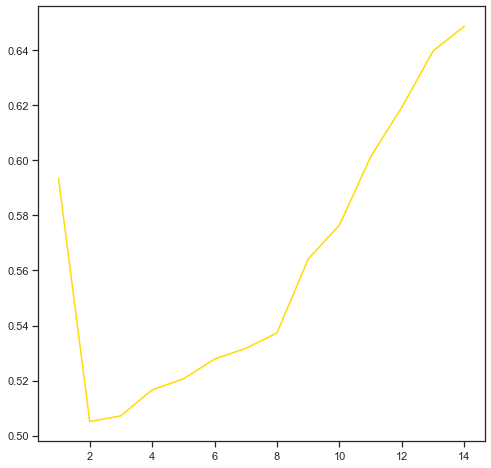

In [81]:
plt.plot(depth, error)
plt.show()   #depth 2